# 1. Install and Import Dependencies

In [5]:
pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mediapipe as mp
import cv2
import numpy as np
import os
import uuid

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 2. Draw Hands
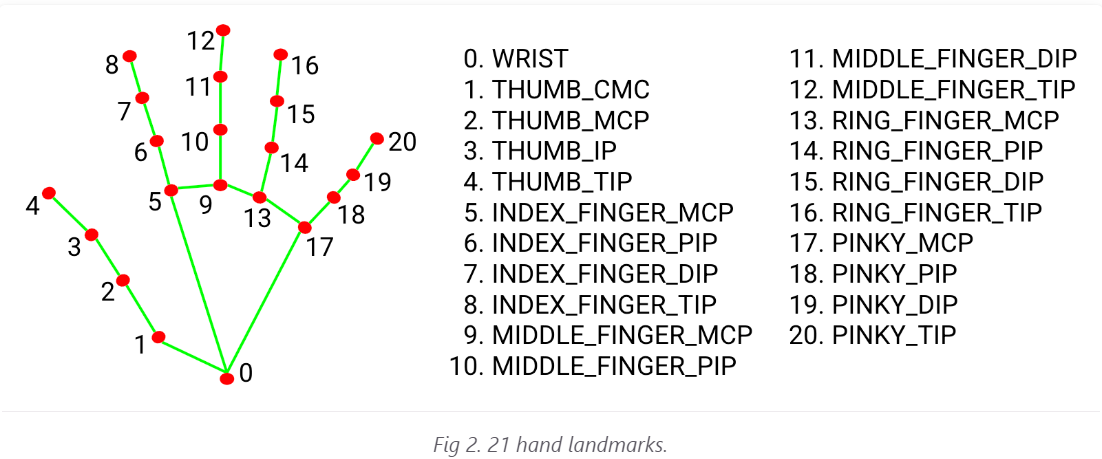

In [3]:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5, max_num_hands = 4) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on Horizontal Axis
        image = cv2.flip(image, 1)
        
        # Set Flag to False
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set Flag to True
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
        
        cv2.imshow("Hand Tracking", image)
        k = cv2.waitKey(5)
        if(k == ord('q')):
            break
cap.release()
cv2.destroyAllWindows()